In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from math import atan2
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_motion_CoM_acc
%store -r Y_motion_CoM_acc
print(X_motion_CoM_acc.shape)
print(Y_motion_CoM_acc.shape)

(17401, 28)
(17401, 2)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where FL foot is swinging
idx_fl_rr_swinging = np.where(X_motion_CoM_acc[:, 21] == 1)[0]
X_motion_CoM_acc_FL_RR = X_motion_CoM_acc[idx_fl_rr_swinging]
Y_motion_CoM_acc_FL_RR = Y_motion_CoM_acc[idx_fl_rr_swinging]

In [8]:
idx_fl_rr_swinging.shape

(8678,)

## Predict CoM -> x

In [9]:
X_motion_CoM_acc_FL_RR[0, :]

array([0.1, 0.0, 0.0, 0.04003643754386367, -0.06632427524371631,
       0.05440154133179677, 0.004392074717402865, 0.028990473318883082,
       0.026539358419426208, 0.2266403552091345, 0.18001143350943213,
       -0.40865640096990447, 0.23994107920695648, -0.16991884084426215,
       -0.4083566806884979, -0.23852180117240723, 0.16382313589384312,
       -0.41169443668721084, -0.25160387270911094, -0.15317045889655073,
       -0.412524981277665, True, False, False, True, 0.0, 0.0, 0.0],
      dtype=object)

In [10]:
Y_motion_CoM_acc_FL_RR[0, :]

array([0.007225971936990837, 0.008454962327513053], dtype=object)

### Linear Regression

In [16]:
# Input
X = np.hstack((X_motion_CoM_acc_FL_RR[:, :3], # previous motion command
               X_motion_CoM_acc_FL_RR[:, -3:], # commanded motion command
               X_motion_CoM_acc_FL_RR[:, 9:11], # FL (x,y) position
               X_motion_CoM_acc_FL_RR[:, 12:14], # FR (x,y) position
               X_motion_CoM_acc_FL_RR[:, 15:17], # RL (x,y) position
               X_motion_CoM_acc_FL_RR[:, 18:20])) # RR (x,y) position

# Labels
Y = np.array([Y_motion_CoM_acc_FL_RR[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fl_com_x = LinearRegression()

# Fit the model
model_fl_com_x.fit(X_train, Y_train)

# Predict
predictions = model_fl_com_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.8319108211568552
RMSE:  0.007815493843926689
The lowest error is:  6.119723519604214e-06
The highest error is:  0.044689946590708116
The avg. error is:  0.005324424428277466


In [50]:
model_fl_com_x.coef_

array([[ 0.11224987,  0.0415022 ,  0.04151491,  0.05764547, -0.01221991,
        -0.01842971,  0.05485544, -0.12854915,  0.10543137, -0.29915887,
        -0.16858387, -0.02726846,  0.08331259,  0.01020945]])

In [52]:
model_fl_com_x.intercept_

array([-0.08524986])

Text(0, 0.5, 'Predictions')

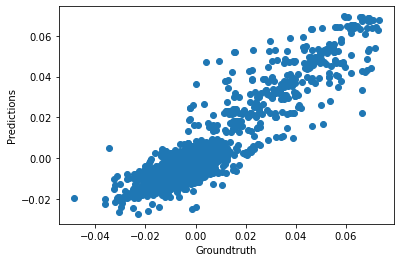

In [19]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [20]:
#%store model_fl_com_x

In [21]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [22]:
# Save model
#joblib.dump(model_fl_com_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fl_com_x.sav")

## Predict FL foot -> y

### Linear Regression

In [46]:
# Input
X = np.hstack((X_motion_CoM_acc_FL_RR[:, :3], # previous motion command
               X_motion_CoM_acc_FL_RR[:, -3:], # commanded motion command
               X_motion_CoM_acc_FL_RR[:, 9:11], # FL (x,y) position
               X_motion_CoM_acc_FL_RR[:, 12:14], # FR (x,y) position
               X_motion_CoM_acc_FL_RR[:, 15:17], # RL (x,y) position
               X_motion_CoM_acc_FL_RR[:, 18:20])) # RR (x,y) position

# Labels
Y = np.array([Y_motion_CoM_acc_FL_RR[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fl_com_y = LinearRegression()

# Fit the model
model_fl_com_y.fit(X_train, Y_train)

# Predict
predictions = model_fl_com_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9020556894462253
RMSE:  0.01223347077042831
The lowest error is:  7.038264649095183e-06
The highest error is:  0.06308162155698552
The avg. error is:  0.00832041275203336


In [53]:
model_fl_com_y.coef_

array([[ 0.06754555,  0.09836172,  0.10635071, -0.01552698,  0.04425489,
         0.05699594, -0.01419293,  0.25733514, -0.35208047,  0.23917549,
        -0.14241405,  0.08402686,  0.07386131,  0.07169628]])

In [55]:
model_fl_com_y.intercept_

array([0.06500263])

Text(0, 0.5, 'Predictions')

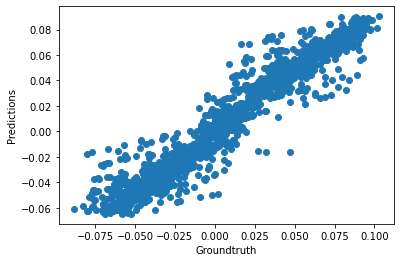

In [49]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [82]:
#%store model_fl_com_y

In [83]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [84]:
# Save model
#joblib.dump(model_fl_com_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fl_com_y.sav")